# Example of the mixing_sp() function 

Author: Charles Le Losq

This function allows one to mix two endmembers spectra, $ref1$ and $ref2$, to an observed one $obs$:

$obs = ref1 * F1 + ref2 * (1-F1)$ .

The calculation is done with performing least absolute regression, which presents advantages compared to least squares to fit problems with outliers as well as non-Gaussian character (see [wikipedia](https://en.wikipedia.org/wiki/Least_absolute_deviations) for instance).

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import rampy as rp

# Problem setting

We will setup a simple problem in which we mix two Gaussian peaks in different ratios. The code below is going to create those peaks, and to plot them for reference.

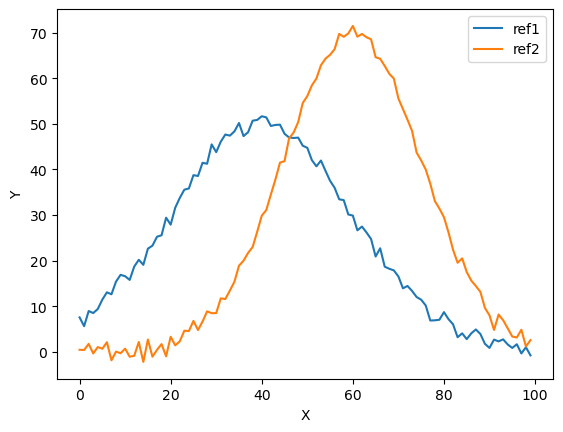

In [2]:
x = np.arange(0,100,1.0) # a dummy x axis
ref1 = 50.0*np.exp(-1/2*((x-40)/20)**2) + np.random.randn(len(x)) # a gaussian with added noise
ref2 = 70.0*np.exp(-1/2*((x-60)/15)**2) + np.random.randn(len(x)) # a gaussian with added noise
plt.figure()
plt.plot(x,ref1,label="ref1")
plt.plot(x,ref2,label="ref2")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()

We now create 4 intermediate $obs$ signals, with $F1$ = 20%,40%,60% and 80% of ref1.

Text(0.5, 1.0, 'Observed signals')

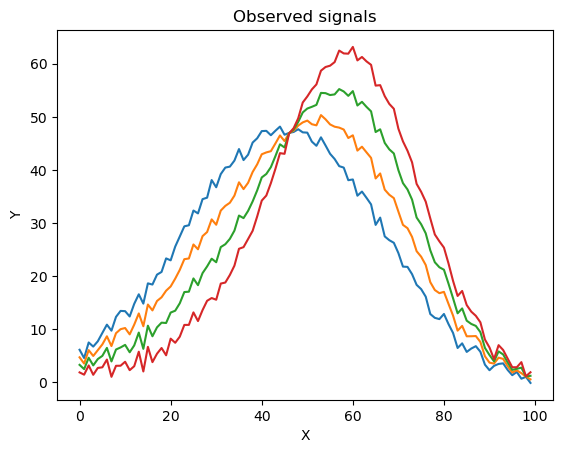

In [3]:
F1_true = np.array([0.80,0.60,0.40,0.20])
obs = np.dot(ref1.reshape(-1,1),F1_true.reshape(1,-1)) + np.dot(ref2.reshape(-1,1),(1-F1_true.reshape(1,-1)))
plt.figure()
plt.plot(x,obs)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Observed signals")

Now we can use rp.mixing_sp() to retrieve $F1$.

We suppose here that we have some knowledge of $ref1$ and $ref2$.

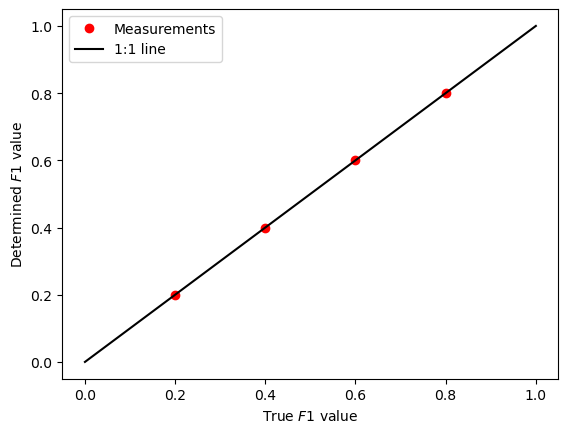

In [4]:
F1_meas = rp.mixing_sp(obs,ref1,ref2)
plt.figure()
plt.plot(F1_true,F1_meas,'ro',label="Measurements")
plt.plot([0,1],[0,1],'k-',label="1:1 line")
plt.xlabel("True $F1$ value")
plt.ylabel("Determined $F1$ value")
plt.legend()